In [1]:
%matplotlib inline
import os
from subprocess import call
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
droot = '/glade/scratch/mclong/calcs/iucn-ch/work'
ds = xr.open_dataset(os.path.join(droot,'ctrl.005.ann_dft.O2.1920-2100.nc'),
                     decode_times=False,decode_coords=False)
dsm = ds.sel(z_t=slice(200e2,600e2)).mean('z_t')
dsm.O2.encoding = ds.O2.encoding
dsm.O2.attrs = ds.O2.attrs
dsm.O2.attrs['coordinates'] = 'TLONG TLAT time'
dsm.O2.isel(time=0).plot()

<xarray.Dataset>
Dimensions:               (d2: 2, lat_aux_grid: 395, moc_comp: 3, moc_z: 61, nlat: 384, nlon: 320, time: 181, transport_comp: 5, transport_reg: 2, z_t: 60, z_t_150m: 15, z_w: 60, z_w_bot: 60, z_w_top: 60)
Coordinates:
  * z_t                   (z_t) float64 500.0 1.5e+03 2.5e+03 3.5e+03 ...
  * lat_aux_grid          (lat_aux_grid) float32 -79.48815 -78.952896 ...
  * moc_z                 (moc_z) float32 0.0 1000.0 2000.0 3000.0 4000.0 ...
  * z_t_150m              (z_t_150m) float32 500.0 1500.0 2500.0 3500.0 ...
  * z_w                   (z_w) float32 0.0 1000.0 2000.0 3000.0 4000.0 ...
  * z_w_bot               (z_w_bot) float32 1000.0 2000.0 3000.0 4000.0 ...
  * z_w_top               (z_w_top) float32 0.0 1000.0 2000.0 3000.0 4000.0 ...
  * time                  (time) float64 1.725e+05 1.728e+05 1.732e+05 ...
Dimensions without coordinates: d2, moc_comp, nlat, nlon, transport_comp, transport_reg
Data variables:
    ANGLE                 (nlat, nlon) float64 ...
 

In [6]:
file_in = os.path.join(droot,'ctrl.005.ann_dft_avg200-600m.O2.1920-2100.nc')
file_out = os.path.join(droot,'ctrl.005.ann_dft_avg200-600m_var-wgt-frq.O2.1920-2100.nc')
print(file_in)
print(file_out)

/glade/scratch/mclong/calcs/iucn-ch/work/ctrl.005.ann_dft_avg200-600m.O2.1920-2100.nc
/glade/scratch/mclong/calcs/iucn-ch/work/ctrl.005.ann_dft_avg200-600m_var-wgt-frq.O2.1920-2100.nc


In [ ]:
dsm.to_netcdf(file_in,unlimited_dims=['time'])

In [38]:
os.environ['VARNAME'] = 'O2'
os.environ['FILE_IN'] = os.path.join(droot,'ctrl.005.ann_dft_avg200-600m.O2.1920-2100.nc')
os.environ['FILE_OUT'] = file_out
os.environ['ABNORMAL_EXIT'] = 'ncl.exitfile'
!module load ncl; ncl calc.variance_weighted_freq.ncl

 Copyright (C) 1995-2017 - All Rights Reserved
 University Corporation for Atmospheric Research
 NCAR Command Language Version 6.4.0
 The use of this software is governed by a License Agreement.
 See http://www.ncl.ucar.edu/ for more details.
(0)	----------------------------------
(0)	shell inputs
(0)	FLAGS:    missing
(0)	GRID_FILE:    missing
(0)	DOMAIN_NCL:    missing
(0)	UNITS_NCL:    missing
(0)	DERIVED_NCL:    missing
(0)	TITLE:    missing
(0)	DIMAVG:    missing
(0)	DIMCOORD:    missing
(0)	DIMSUB:    missing
(0)	FILE_IN:    /glade/scratch/mclong/calcs/iucn-ch/work/ctrl.005.ann_dft_avg200-600m.O2.1920-2100.nc
(0)	VARNAME:    O2
(0)	ABNORMAL_EXIT:    ncl.exitfile
(0)	FILE_OUT:    /glade/scratch/mclong/calcs/iucn-ch/work/ctrl.005.ann_dft_avg200-600m_var-wgt-frq.O2.1920-2100.nc


Variable: env
Type: string
Total Size: 8 bytes
            1 values
Number of Dimensions: 1
Dimensions and sizes:	[1]
Coordinates: 
Number Of Attributes: 13
  FILE_OUT :	/glade/scratch/mclong/calcs/iucn-ch/

In [7]:
dsf = xr.open_dataset(file_out,decode_times=False)
dsf

<xarray.Dataset>
Dimensions:        (freq: 90, nlat: 384, nlon: 320, scalar: 1)
Coordinates:
  * freq           (freq) float64 0.005525 0.01105 0.01657 0.0221 0.02762 ...
Dimensions without coordinates: nlat, nlon, scalar
Data variables:
    spcx           (freq, nlat, nlon) float64 ...
    bw             (scalar) float64 ...
    dof            (scalar) float64 ...
    xavg           (nlat, nlon) float64 ...
    xvari          (nlat, nlon) float64 ...
    xvaro          (nlat, nlon) float64 ...
    xcor           (nlat, nlon) float64 ...
    xslp           (nlat, nlon) float64 ...
    period         (freq) float64 ...
    rednoise       (freq, nlat, nlon) float64 ...
    spcx_ci_lo     (freq, nlat, nlon) float64 ...
    spcx_ci_hi     (freq, nlat, nlon) float64 ...
    varspc_int     (nlat, nlon) float64 ...
    varw_avg_p     (nlat, nlon) float64 ...
    varspc_cumint  (freq, nlat, nlon) float64 ...
Attributes:
    CREATION:       calc.variance_weighted_freq.ncl
    FILE_OUT:       /g

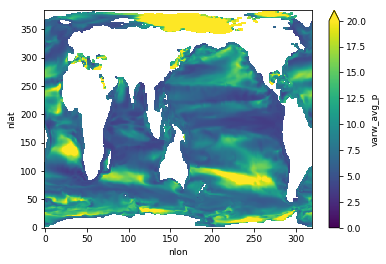

In [14]:
dsf.varw_avg_p.plot(vmin=0,vmax=20)

In [10]:
import plot_tools
lon = ds.TLONG.values
lat = ds.TLAT.values
field = dsf.varw_avg_p.values
lon,lat,z = plot_tools.adjust_pop_grid(lon,lat,field)

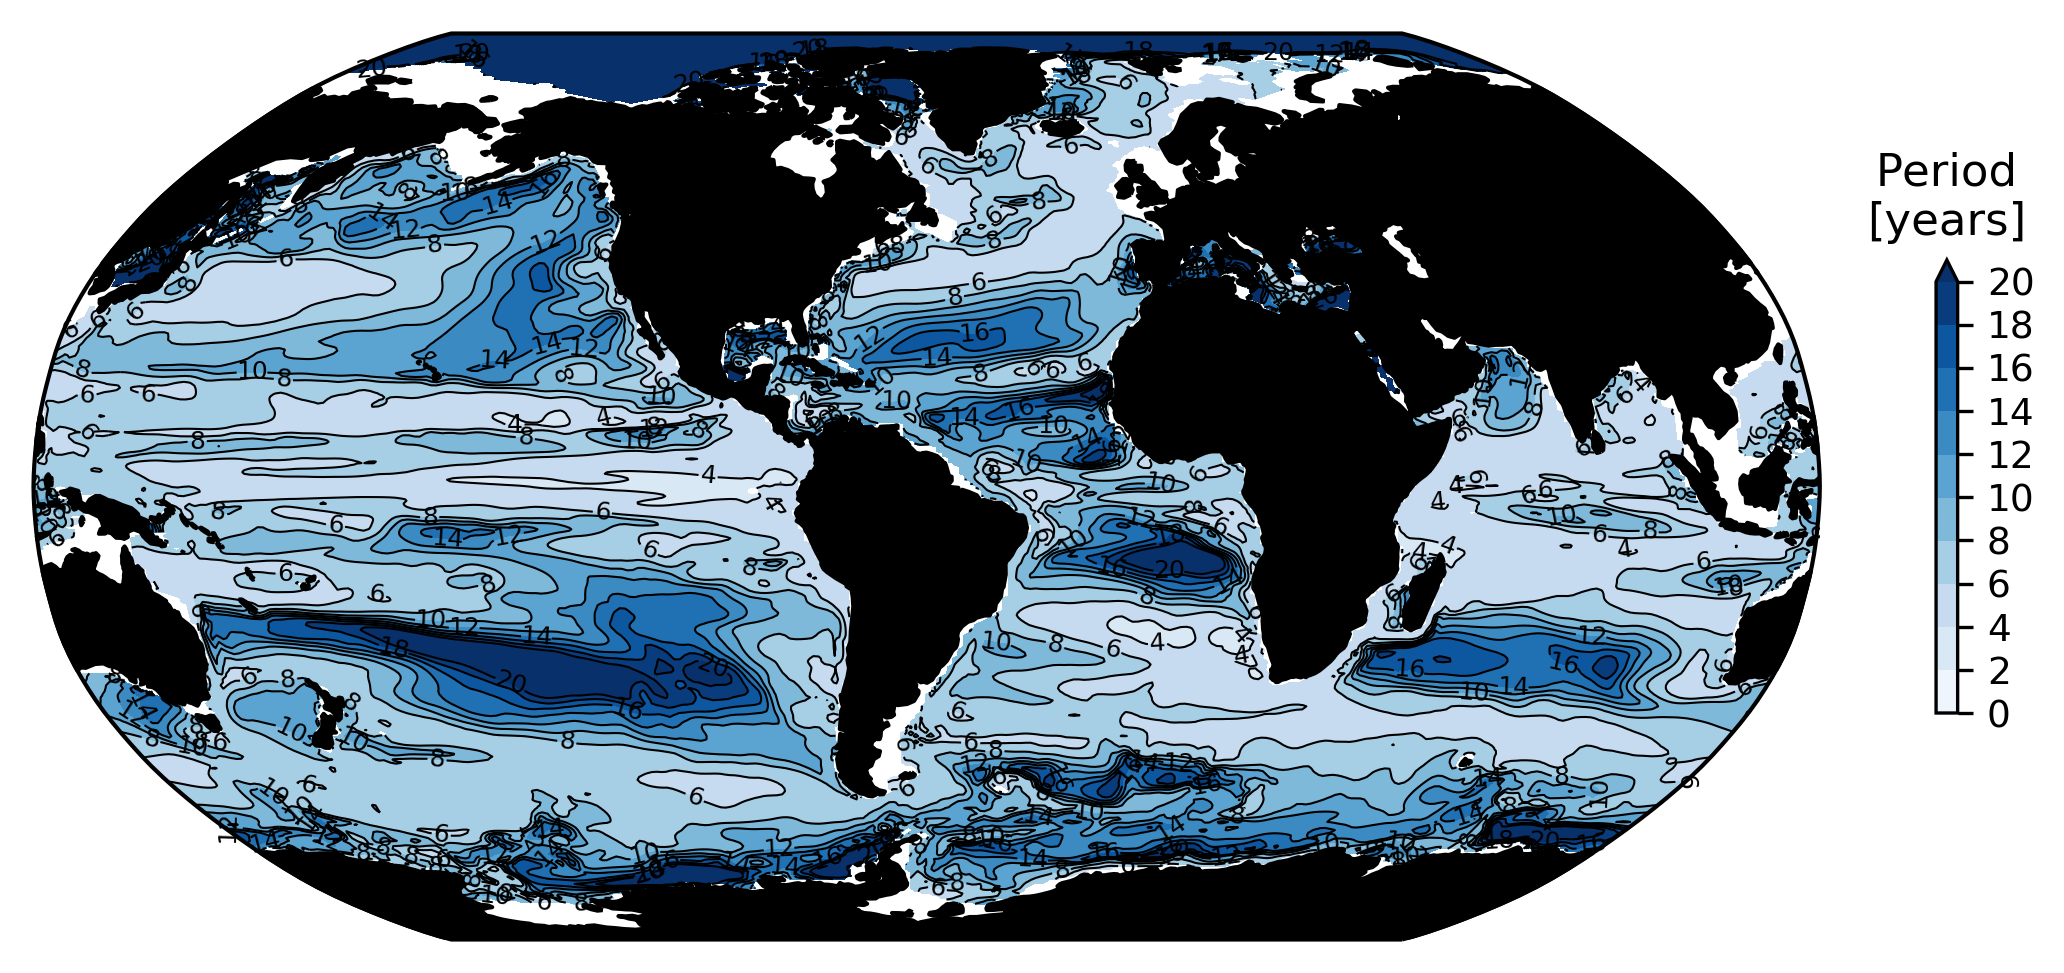

In [18]:
import matplotlib.gridspec as gridspec
reload(plot_tools)
levels = np.arange(0.,22.,2.)
units = 'Period\n[years]'
#norm = plot_tools.MidPointNorm(midpoint=100.)
contour_specs = {'levels':levels,
                 'cmap':'Blues',
                 'extend':'max'}

fig=plt.figure(figsize=(10, 4),dpi=300)
gs = gridspec.GridSpec(1,1)
obj = plot_tools.canvas_map_contour_overlay(lon,lat,z,
                                            contour_specs,
                                            units = units,
                                            fig=fig,
                                            gridspec=gs,
                                            row=0,col=0)
plt.savefig('var-weighted-period-O2.pdf',dpi=300,bbox_inches='tight')

In [27]:
RM_ATTRS = ['grid_loc','coordinates']
CP_ENCODING = ['_FillValue','dtype']

def pop_vertical_integral(da,dz,max_depth_meters=None):
    '''compute vertical integral on pop grid
    '''
    if da.dims[1] not in ['z_t','z_t_150m']:
        raise ValueError('Cannot compute vertical integral on {0}: {1}'.format(da.name,da))

    attrs = da.attrs.copy()
    encoding = da.encoding

    #-- truncate dz for z_t_150m?
    dz = dz[0:da.shape[1]]
    if da.dims[1] != dz.dims[0]:
        dz = dz.rename({dz.dims[0]:da.dims[1]})

    #-- select region of upper-ocean if max_depth is set
    if max_depth_meters is not None:
        max_depth_cm = max_depth_meters * 1e2
        da = da.sel(**{da.dims[1]:slice(0,max_depth_cm)})
        dz = dz.sel(**{da.dims[1]:slice(0,max_depth_cm)})

    dao = (da * dz).sum(dim=da.dims[1])

    if 'units' in attrs:
        attrs['units'] = attrs['units']+' cm'
    dao.attrs = attrs
    dao.encoding = {key:val for key,val in encoding.items() if key in CP_ENCODING}

    return dao

In [23]:
droot = '/glade/scratch/mclong/calcs/iucn-ch/work'
ds = xr.open_dataset(os.path.join(droot,'ctrl.005.ann_dft.NPP.1920-2100.nc'),
                     decode_times=False,decode_coords=False)
ds

<xarray.Dataset>
Dimensions:               (d2: 2, lat_aux_grid: 395, moc_comp: 3, moc_z: 61, nlat: 384, nlon: 320, time: 181, transport_comp: 5, transport_reg: 2, z_t: 60, z_t_150m: 15, z_w: 60, z_w_bot: 60, z_w_top: 60)
Coordinates:
  * z_t_150m              (z_t_150m) float64 500.0 1.5e+03 2.5e+03 3.5e+03 ...
  * lat_aux_grid          (lat_aux_grid) float32 -79.48815 -78.952896 ...
  * moc_z                 (moc_z) float32 0.0 1000.0 2000.0 3000.0 4000.0 ...
  * z_t                   (z_t) float32 500.0 1500.0 2500.0 3500.0 4500.0 ...
  * z_w                   (z_w) float32 0.0 1000.0 2000.0 3000.0 4000.0 ...
  * z_w_bot               (z_w_bot) float32 1000.0 2000.0 3000.0 4000.0 ...
  * z_w_top               (z_w_top) float32 0.0 1000.0 2000.0 3000.0 4000.0 ...
  * time                  (time) float64 1.725e+05 1.728e+05 1.732e+05 ...
Dimensions without coordinates: d2, moc_comp, nlat, nlon, transport_comp, transport_reg
Data variables:
    ANGLE                 (nlat, nlon) float6

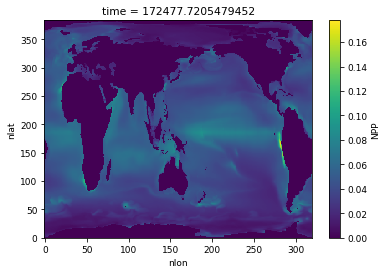

In [29]:
dsm = ds.drop('NPP')
dsm['NPP'] = pop_vertical_integral(ds.NPP,ds.dz)
dsm.NPP.encoding = ds.NPP.encoding
dsm.NPP.attrs = ds.NPP.attrs
dsm.NPP.attrs['coordinates'] = 'TLONG TLAT time'
dsm.NPP.isel(time=0).plot()

In [30]:
dsm

<xarray.Dataset>
Dimensions:               (d2: 2, lat_aux_grid: 395, moc_comp: 3, moc_z: 61, nlat: 384, nlon: 320, time: 181, transport_comp: 5, transport_reg: 2, z_t: 60, z_t_150m: 15, z_w: 60, z_w_bot: 60, z_w_top: 60)
Coordinates:
  * z_t_150m              (z_t_150m) float64 500.0 1.5e+03 2.5e+03 3.5e+03 ...
  * lat_aux_grid          (lat_aux_grid) float32 -79.48815 -78.952896 ...
  * moc_z                 (moc_z) float32 0.0 1000.0 2000.0 3000.0 4000.0 ...
  * z_t                   (z_t) float32 500.0 1500.0 2500.0 3500.0 4500.0 ...
  * z_w                   (z_w) float32 0.0 1000.0 2000.0 3000.0 4000.0 ...
  * z_w_bot               (z_w_bot) float32 1000.0 2000.0 3000.0 4000.0 ...
  * z_w_top               (z_w_top) float32 0.0 1000.0 2000.0 3000.0 4000.0 ...
  * time                  (time) float64 1.725e+05 1.728e+05 1.732e+05 ...
Dimensions without coordinates: d2, moc_comp, nlat, nlon, transport_comp, transport_reg
Data variables:
    ANGLE                 (nlat, nlon) float6

In [31]:
file_in = os.path.join(droot,'ctrl.005.ann_dft_zint.NPP.1920-2100.nc')
file_out = os.path.join(droot,'ctrl.005.ann_dft_zint_var-wgt-frq.NPP.1920-2100.nc')
print(file_in)
print(file_out)

/glade/scratch/mclong/calcs/iucn-ch/work/ctrl.005.ann_dft_zint.NPP.1920-2100.nc
/glade/scratch/mclong/calcs/iucn-ch/work/ctrl.005.ann_dft_zint_var-wgt-frq.NPP.1920-2100.nc


In [32]:
dsm.to_netcdf(file_in,unlimited_dims=['time'])

In [37]:

os.environ['VARNAME'] = 'NPP'
os.environ['FILE_IN'] = file_in
os.environ['FILE_OUT'] = file_out
os.environ['ABNORMAL_EXIT'] = 'ncl.exitfile'
!module load ncl; ncl calc.variance_weighted_freq.ncl

 Copyright (C) 1995-2017 - All Rights Reserved
 University Corporation for Atmospheric Research
 NCAR Command Language Version 6.4.0
 The use of this software is governed by a License Agreement.
 See http://www.ncl.ucar.edu/ for more details.
(0)	----------------------------------
(0)	shell inputs
(0)	FLAGS:    missing
(0)	GRID_FILE:    missing
(0)	DOMAIN_NCL:    missing
(0)	UNITS_NCL:    missing
(0)	DERIVED_NCL:    missing
(0)	TITLE:    missing
(0)	DIMAVG:    missing
(0)	DIMCOORD:    missing
(0)	DIMSUB:    missing
(0)	FILE_IN:    /glade/scratch/mclong/calcs/iucn-ch/work/ctrl.005.ann_dft_zint.NPP.1920-2100.nc
(0)	VARNAME:    NPP
(0)	ABNORMAL_EXIT:    ncl.exitfile
(0)	FILE_OUT:    /glade/scratch/mclong/calcs/iucn-ch/work/ctrl.005.ann_dft_zint_var-wgt-frq.NPP.1920-2100.nc


Variable: env
Type: string
Total Size: 8 bytes
            1 values
Number of Dimensions: 1
Dimensions and sizes:	[1]
Coordinates: 
Number Of Attributes: 13
  FILE_OUT :	/glade/scratch/mclong/calcs/iucn-ch/work/ctrl.0

In [38]:
dsf = xr.open_dataset(file_out,decode_times=False)
dsf

IOError: [Errno 2] No such file or directory: '/glade/scratch/mclong/calcs/iucn-ch/work/ctrl.005.ann_dft_zint_var-wgt-frq.NPP.1920-2100.nc'

In [ ]:
lon = ds.TLONG.values
lat = ds.TLAT.values
field = dsf.varw_avg_p.values
lon,lat,z = plot_tools.adjust_pop_grid(lon,lat,field)